In [159]:
import tensorflow as tf
import keras
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

In [231]:
iris_data = load_iris(as_frame=True)

features = iris_data["data"]
target = iris_data["target"]


data = pd.concat([features, target], axis=1)

interest = data.query("target != 2").iloc[:, ::2].to_numpy().astype(np.float32)

In [232]:
x_train, x_test, y_train, y_test = train_test_split(interest[:, :2], interest[:, -1], test_size=0.2)

x_input = x_train.shape[1]

<h3>Problem 3</h3>

In [130]:
model = keras.Sequential()

model.add(keras.layers.Input((x_input,), 20))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, keras.activations.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4344 - loss: 0.6864  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4523 - loss: 0.6436 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.6143 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.5836 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.5548 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5278 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4947 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4632 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.4361 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.4025 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3714 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.3401 


1/1 - 0s - 104ms/step - accuracy: 1.0000 - loss: 0.1161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


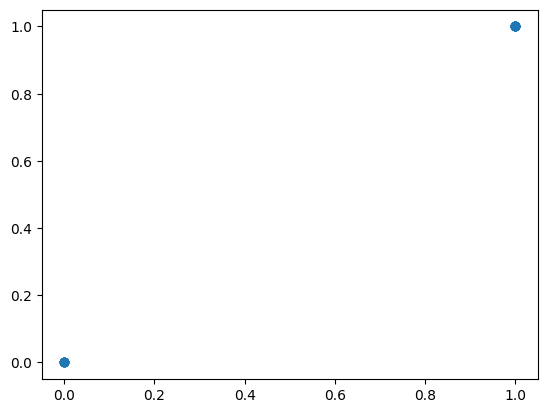

In [131]:
model.evaluate(x_test, y_test, verbose=2)

pred = model.predict(x_test)

plt.scatter(np.where(pred > 0.5, 1, 0), y_test)

<h3>Problem 4</h3>

In [132]:
class MultiClassification(keras.Model):
    def __init__(self, n_class):
        super().__init__()
        
        self.dense1 = keras.layers.Dense(100, activation="relu")
        self.dense2 = keras.layers.Dense(50, activation="relu")
        self.out = keras.layers.Dense(n_class, activation= "softmax")
    
    def call(self, input, training=False):
        x = self.dense1(input)
        x = self.dense2(x)

        return self.out(x)



In [147]:
x = features.to_numpy()
onv = OneHotEncoder(sparse_output=False)

target = target.to_numpy().reshape(-1, 1)
target = onv.fit_transform(target)
x_train, x_test, y_train, y_test = train_test_split(features.to_numpy(), target, test_size=0.2)



x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2)


In [149]:
model = MultiClassification(3)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=40, batch_size=20, validation_data=[x_val, y_val])


Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3625 - loss: 1.1643 - val_accuracy: 0.3750 - val_loss: 1.1274
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4313 - loss: 0.9878 - val_accuracy: 0.7500 - val_loss: 0.8716
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6625 - loss: 0.8879 - val_accuracy: 0.9583 - val_loss: 0.7764
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9354 - loss: 0.8149 - val_accuracy: 0.8333 - val_loss: 0.7054
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7646 - loss: 0.7279 - val_accuracy: 0.7500 - val_loss: 0.6500
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7042 - loss: 0.6783 - val_accuracy: 0.8333 - val_loss: 0.5975
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8167 - loss: 0.6403 - val_accuracy: 0.9583 - val_loss: 0.5519
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9694 - loss: 0.5963 - val_accuracy: 0.9583 - val_loss: 0.4978
Epoch 9

In [150]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9667 - loss: 0.1933


[0.19327197968959808, 0.9666666388511658]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Text(0.5, 0, ' prediction')

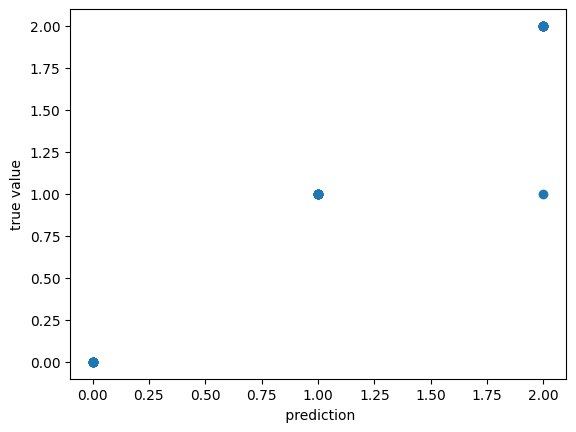

In [154]:
pred = np.argmax(model.predict(x_test), 1)

plt.scatter(pred, np.argmax(y_test, 1))
plt.ylabel("true value")
plt.xlabel(" prediction")

<h3>Problem 5</h3>

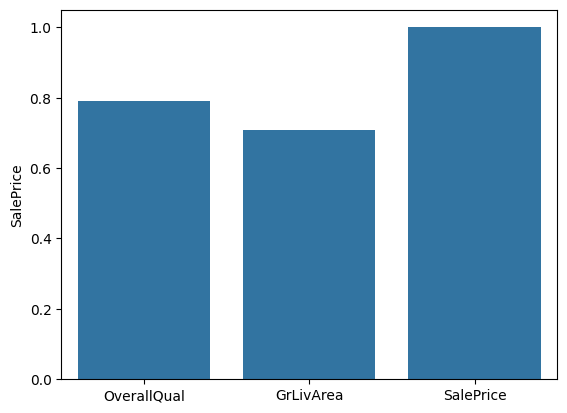

In [164]:
houseData = pd.read_csv("./data/train.csv")

potential = houseData.corr(numeric_only=True)["SalePrice"]
potential = potential[potential > 0.65]

sns.barplot(potential)

features = potential.keys()

x_train, x_test, y_train, y_test = train_test_split(houseData[features].to_numpy(), houseData["SalePrice"], test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [165]:
class LinearRegression(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer1 = keras.layers.Dense(500)
        self.layer2 = keras.layers.Dense(250)
        self.layer3 = keras.layers.Dense(125)
        self.layer4 = keras.layers.Dense(20)
        self.out = keras.layers.Dense(1)
    
    def call(self, x_input):
        x = self.layer1(x_input)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.out(x)



In [167]:
linear = LinearRegression()

linear.compile(optimizer=keras.optimizers.Adam(1e-4), loss=keras.losses.mean_squared_logarithmic_error)
linear.fit(x_train, y_train, epochs=50, batch_size=20, validation_data=[x_val, y_val])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6325 - val_loss: 4.5648e-04
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6778e-04 - val_loss: 7.0730e-07
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3956e-07 - val_loss: 4.5703e-08
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2654e-08 - val_loss: 3.6432e-08
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3576e-08 - val_loss: 3.4901e-08
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4414e-08 - val_loss: 3.4224e-08
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4169e-08 - val_loss: 3.3903e-08
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2809e-08 - val_loss: 3.3700e-08
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2558e-08 - val_loss: 3.3615e-08
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5433e-08 - val_loss: 3.3616e-08
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2230e-08 - val_loss: 3

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0, 0.5, 'True value')

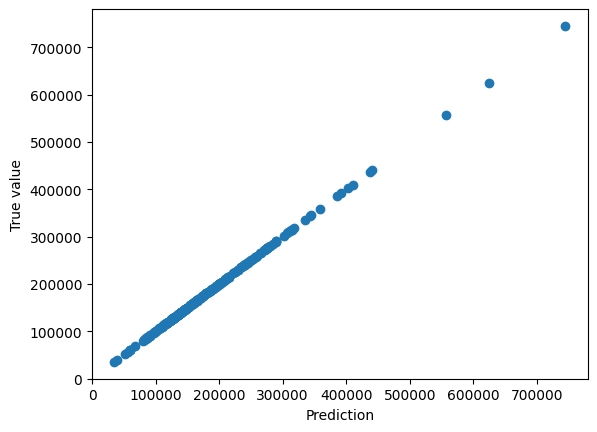

In [171]:
pred = linear.predict(x_test)

plt.scatter(pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("True value")

#### Problem 6

In [174]:
from keras.datasets.mnist import load_data

In [183]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
x_train, x_test = x_train/255, x_test/255


y_train = y_train.reshape(-1, 1)
y_train = onv.fit_transform(y_train)


In [197]:
model = MultiClassification(10)

model.compile(optimizer="Adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy", "recall"])
model.fit(x_train[:10000], y_train[:10000], epochs=50, batch_size=20)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7416 - loss: 0.8767 - recall: 0.5667
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9349 - loss: 0.2254 - recall: 0.9194
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1474 - recall: 0.9481
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1196 - recall: 0.9609
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0784 - recall: 0.9718
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0635 - recall: 0.9790
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0456 - recall: 0.9848
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0276 - recall: 0.9918
Epoch 9/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9943 - loss: 0.0229 - recall: 0.9937
Epoch 10/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9957 -

In [198]:
pred = np.argmax(model.predict(x_test), 1)

y_test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [224]:
c = sum(pred == y_test * 1)

accuracy = c/pred.shape[0]

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


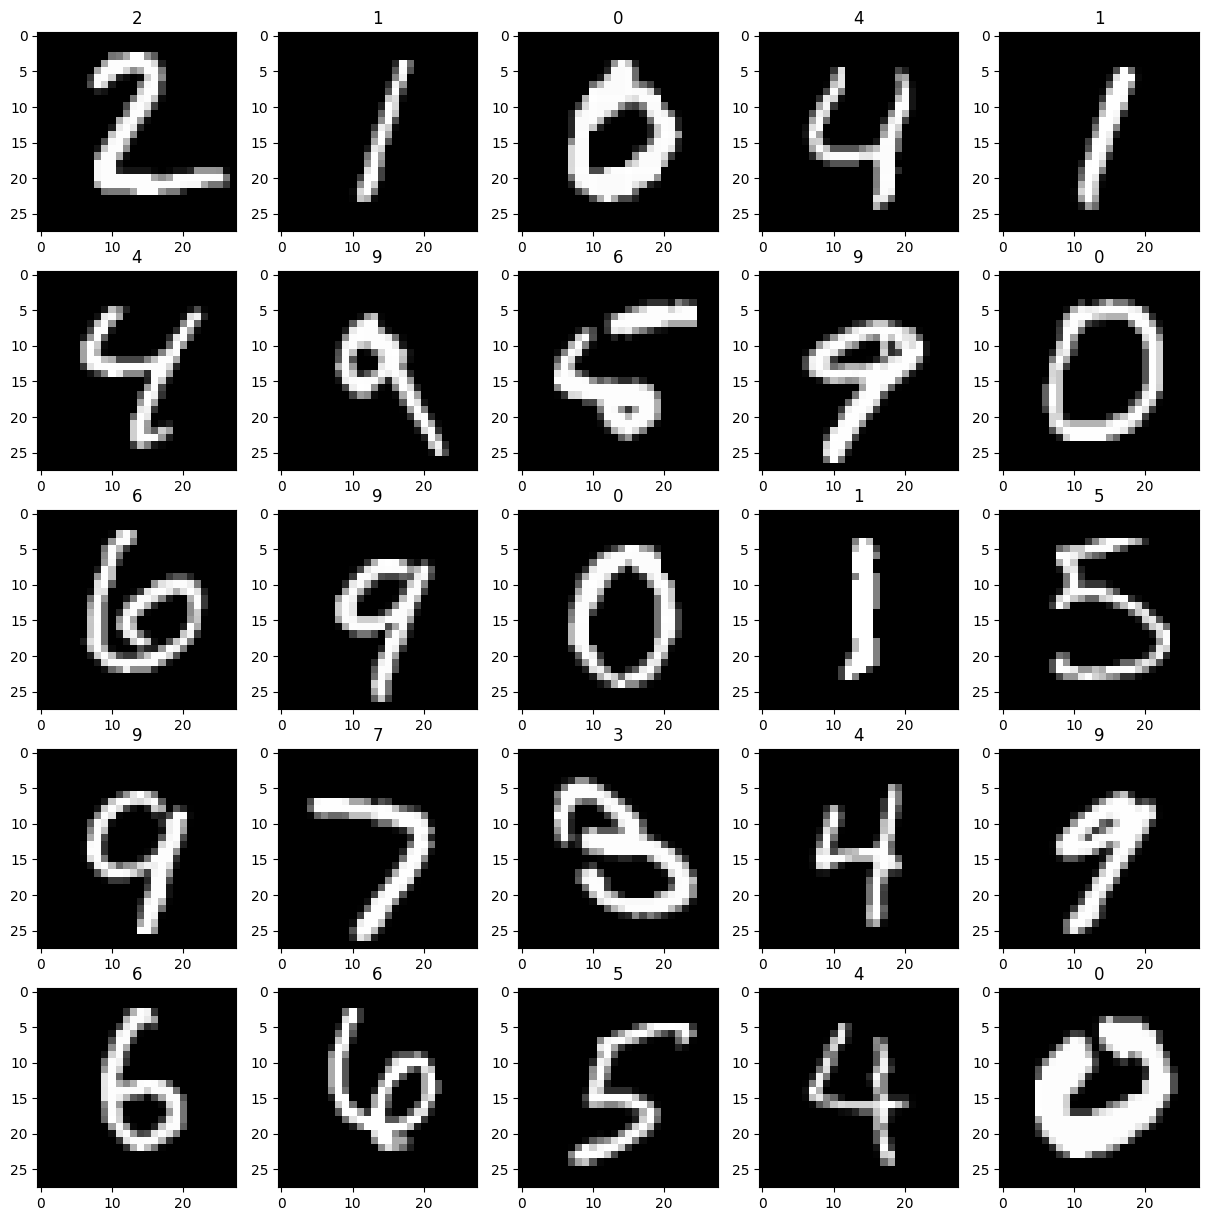

In [219]:
fig = plt.figure(figsize=(15, 15))
x_test = x_test.reshape(-1, 28, 28)
for i in range(1, 26):
    axes = plt.subplot(5, 5, i)
    axes.imshow(x_test[i], "grey")
    axes.set_title(pred[i])